In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, periodogram
import scipy.interpolate

In [17]:
df = pd.read_csv("./Datasets/Monday/LR04stack.csv", names=["Age", "d18"], skiprows=1)

In [18]:
df.head()

,Age,d18
0,0.0,3.23
1,1.0,3.23
2,2.0,3.18
3,3.0,3.29
4,4.0,3.30


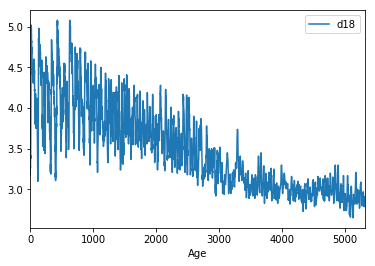

In [19]:
df.plot(x="Age", y="d18")

In [20]:
age = np.arange(0, 5000)
fd18 = scipy.interpolate.interp1d(df["Age"], df["d18"])
d18 = fd18(age)
df = pd.DataFrame({"Age":age, "d18":d18})

In [21]:
f, p = periodogram(df["d18"])

In [22]:
df1 = df[df["Age"]<=1e3]
df5 = df[df["Age"]<=5e3]


In [23]:
f1, p1 = periodogram(df1["d18"])
f5, p5 = periodogram(df5["d18"])

/home/hpahl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/hpahl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


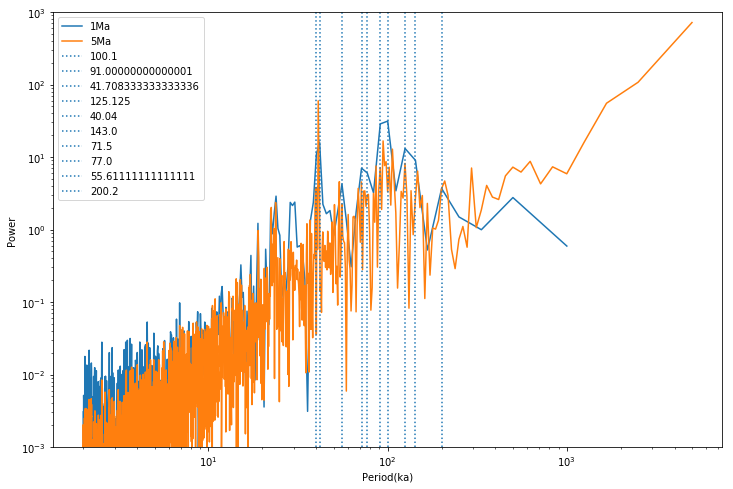

In [25]:
plt.figure(figsize=(12,8))
plt.loglog(1/f1, p1, label="1Ma")
plt.loglog(1/f5, p5, label="5Ma")
peaks = np.argsort(p1)[::-1]
for k in range(10):
    per = 1/f1[peaks[k]]
    plt.axvline(per, label=f"{per}", ls=":")
# plt.axvline(1/f1[np.argmax(p1)], label=f"{1/f1[np.argmax(p1)]}")
plt.ylim(1e-3,1e3)
plt.xlabel("Period(ka)")
plt.ylabel("Power")
plt.legend()
plt.show()